In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('C:/Users/DELL/Desktop/Datasets for projects/Loan Predictions/Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
df.shape

(252000, 13)

In [4]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [5]:
df.head(3)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0


In [6]:
# Knowing the feilds.
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [7]:
# Saving data Copy.
original_data = df.copy()

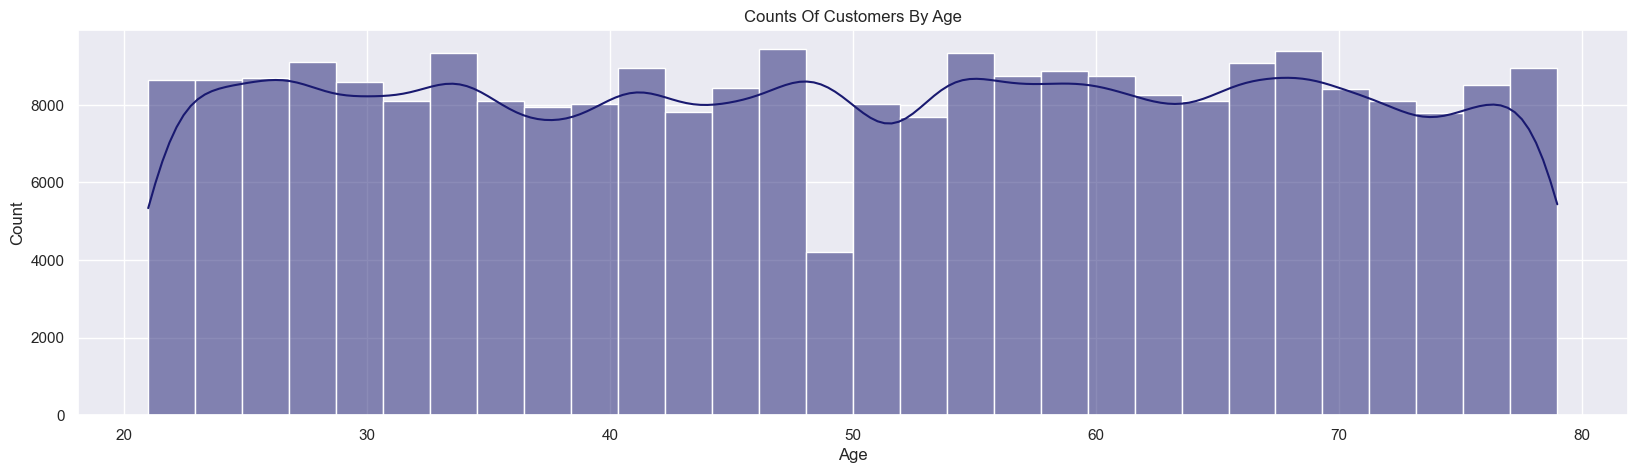

In [45]:
# what age groups data is collected ?
sns.histplot(data=df,x='Age',bins=30,color='midnightblue',kde=True).set(title="Counts Of Customers By Age")
plt.show()

In [9]:
# How many Singles Owns House and Cars ?
df.House_Ownership.unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [10]:
df.Car_Ownership.unique()

array(['no', 'yes'], dtype=object)

In [11]:
df[(df.House_Ownership == 'owned')&(df.Car_Ownership == 'yes')&(df['Married/Single']=='single')].shape[0]

3640

In [12]:
# Calculate the defaulters on the basis of state.
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


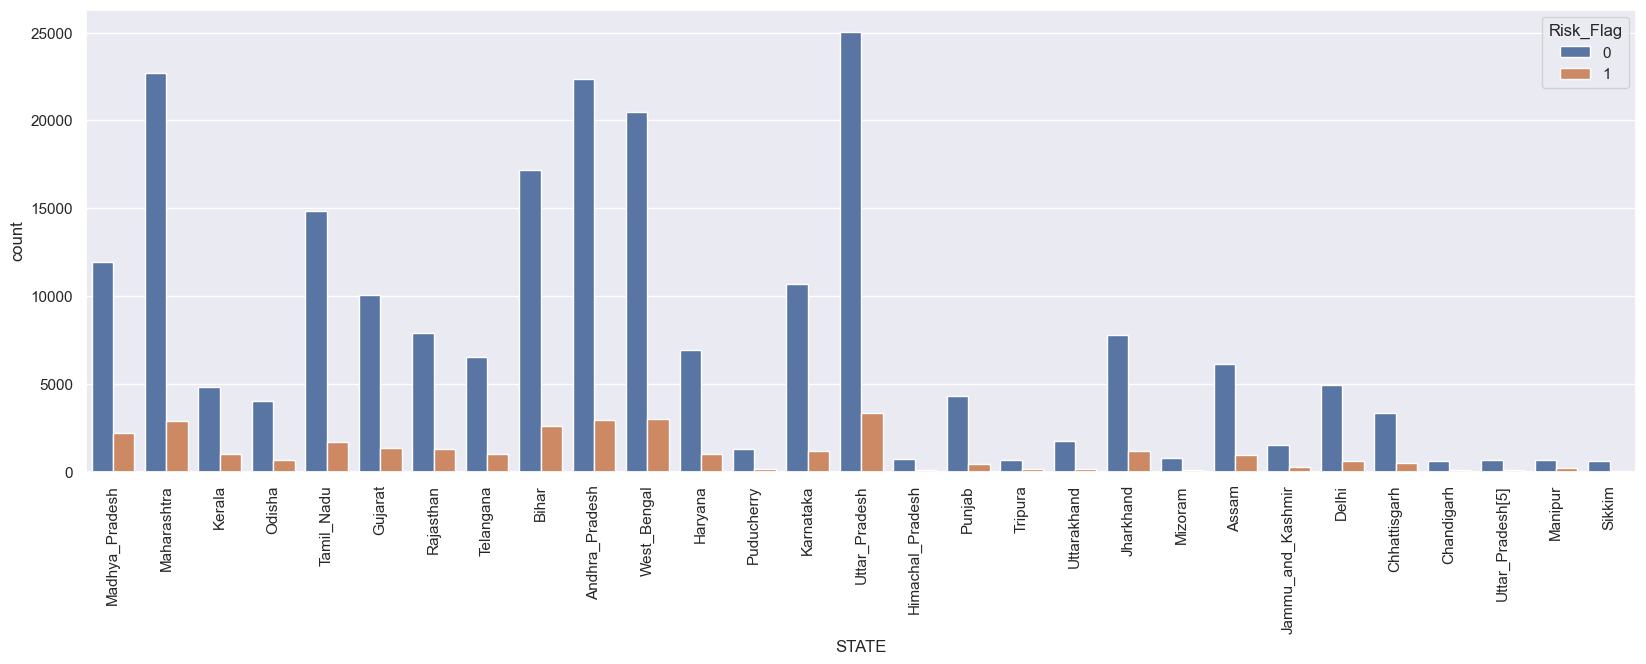

In [13]:
plt.figure(figsize=(20,6))
s = sns.countplot(data=df,hue='Risk_Flag',x='STATE')
s.set_xticklabels(labels=df.STATE.unique(),rotation=90)
plt.show()

In [14]:
# Top 10 cities with highest count of defaulters.
citywise_defaulters = df[df.Risk_Flag==1]
citywise_defaulters.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
14,15,9420838,48,6,single,rented,no,Technical_writer,Madurai,Tamil_Nadu,6,10,1
17,18,3666346,56,12,single,rented,no,Politician,Bhusawal,Maharashtra,12,11,1
28,29,8832725,64,5,single,rented,no,Biomedical_Engineer,Pondicherry,Puducherry,5,11,1


In [15]:
citywise_def = citywise_defaulters.groupby(['CITY'])['CITY'].count()
citywise_def

CITY
Adoni               103
Agartala            136
Agra                 81
Ahmedabad           133
Ahmednagar           38
                   ... 
Vijayanagaram       149
Vijayawada          147
Visakhapatnam[4]    141
Warangal[11][12]     25
Yamunanagar          96
Name: CITY, Length: 317, dtype: int64

In [16]:
citywise_def = citywise_def.to_frame()
citywise_def = citywise_def.rename(columns={'CITY':'City_Counts'})

In [17]:
# Sorting THe Data.
citywise_def = citywise_def.sort_values(by=['City_Counts'],ascending=False)
citywise_def = citywise_def.head(10)
citywise_def

,City_Counts
CITY,
Kochi,243
Satna,232
Buxar[37],228
Srinagar,216
Indore,212
Barasat,206
Mango,200
Bhubaneswar,198
Ghaziabad,196


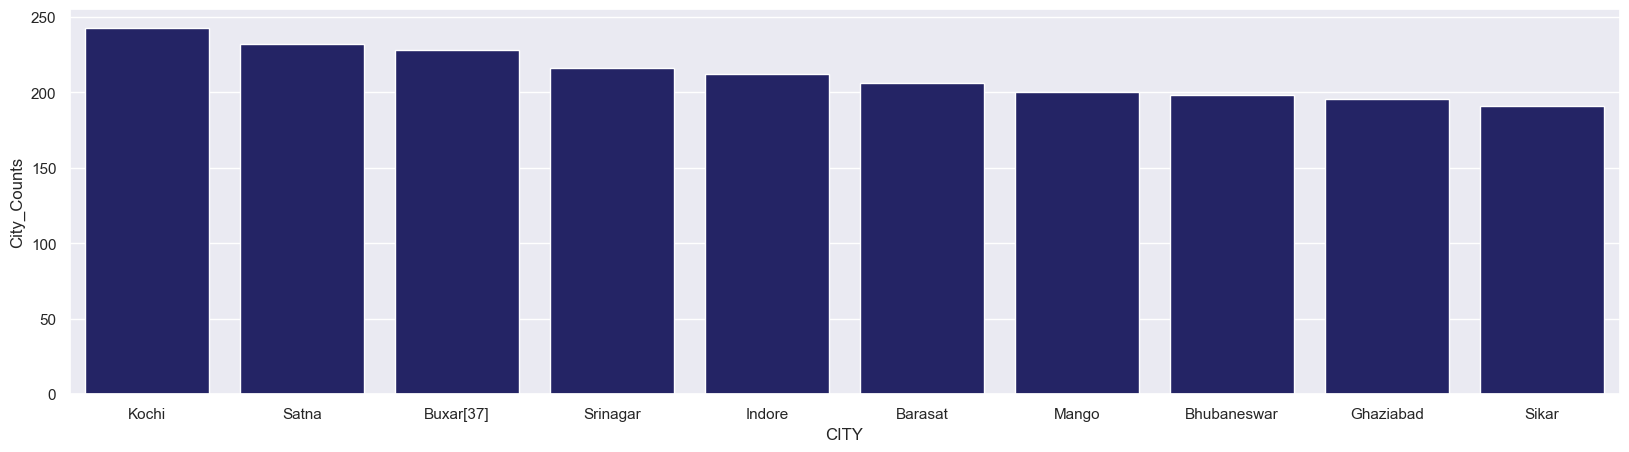

In [18]:
# Counts of maximum defaulters from top 10 cities.
plt.figure(figsize=(20,5))
s1 = sns.barplot(x=citywise_def.index,y=citywise_def.City_Counts,color='midnightblue')
plt.show()

In [19]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [20]:
# Find the house ownership of all customers.
h_owners = df.groupby(['House_Ownership'])['House_Ownership'].count()
h_owners

House_Ownership
norent_noown      7184
owned            12918
rented          231898
Name: House_Ownership, dtype: int64

In [21]:
h_owners = h_owners.to_frame()
h_owners

,House_Ownership
House_Ownership,
norent_noown,7184
owned,12918
rented,231898


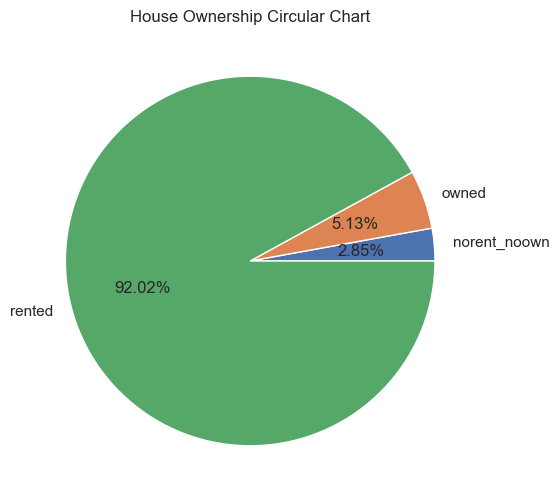

In [22]:
plt.figure(figsize=(20,6))
plt.pie(h_owners['House_Ownership'],autopct='%1.2f%%',labels=h_owners.index)
plt.title("House Ownership Circular Chart")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


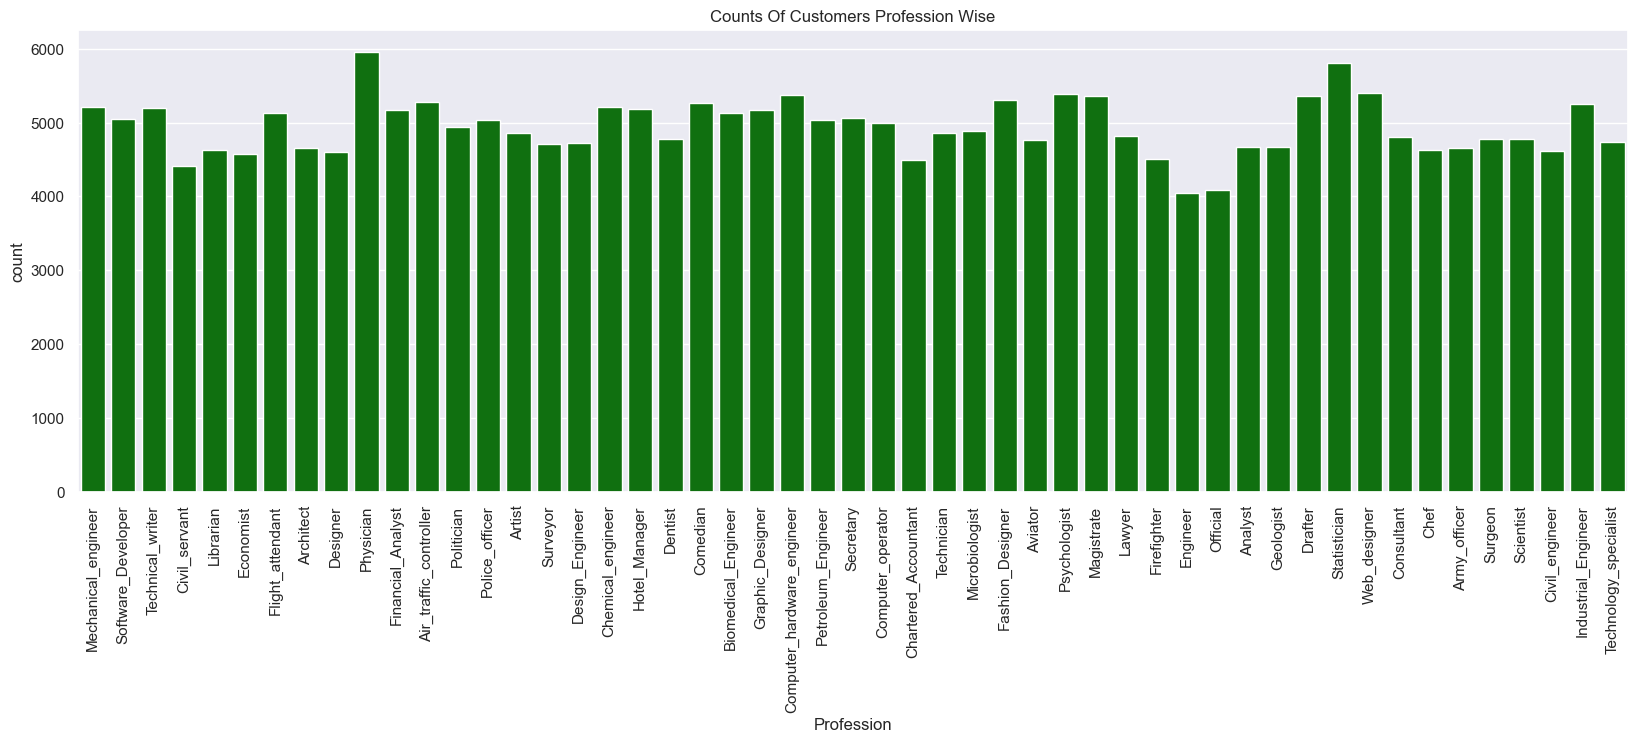

In [23]:
# Customers counts on the basis of their profession.
plt.figure(figsize=(20,6))
plt.title("Counts Of Customers Profession Wise")
s2=sns.countplot(df.Profession,color='green')
s2.set_xticklabels(labels=df.Profession.unique(),rotation=90)
plt.show()

In [24]:
# Count the customers on the basis of their marital status.
marital_df = df.groupby(['Married/Single'])['Married/Single'].count()
marital_df

Married/Single
married     25728
single     226272
Name: Married/Single, dtype: int64

In [25]:
# Changing Series to df.
marital_df = marital_df.to_frame()
marital_df = marital_df.rename(columns={'Married/Single':'Counts'})
marital_df

,Counts
Married/Single,
married,25728
single,226272


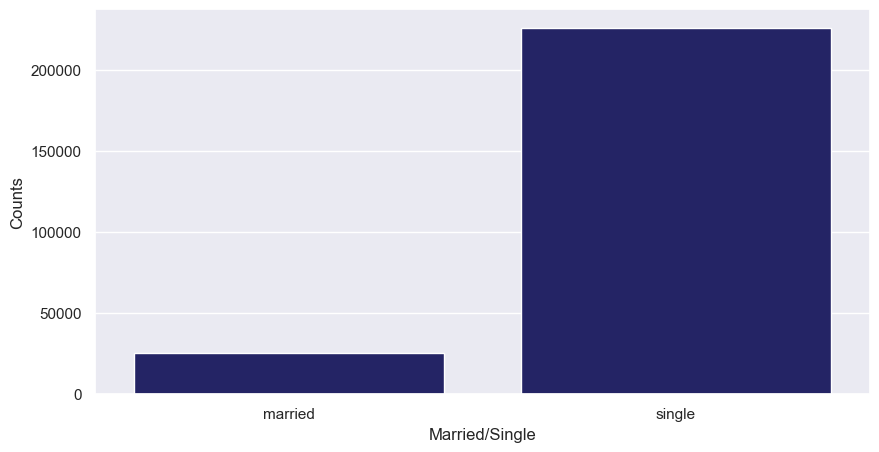

In [26]:
# Now plotting the df.
plt.figure(figsize=(10,5))
s3 = sns.barplot(x=marital_df.index,y=marital_df.Counts,color='midnightblue')
plt.show()

In [27]:
df.head(3)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0


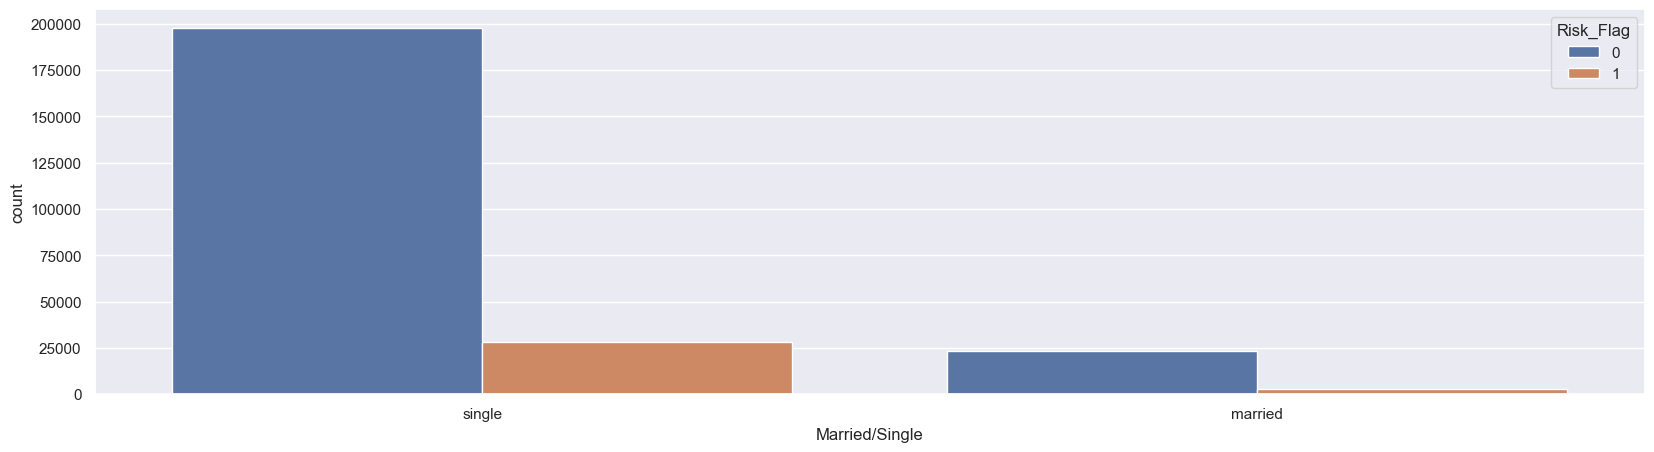

In [28]:
# How many defaulters are there according to marital status ?
plt.figure(figsize=(20,5))
s4 = sns.countplot(data=df,x='Married/Single',hue='Risk_Flag')
plt.show()

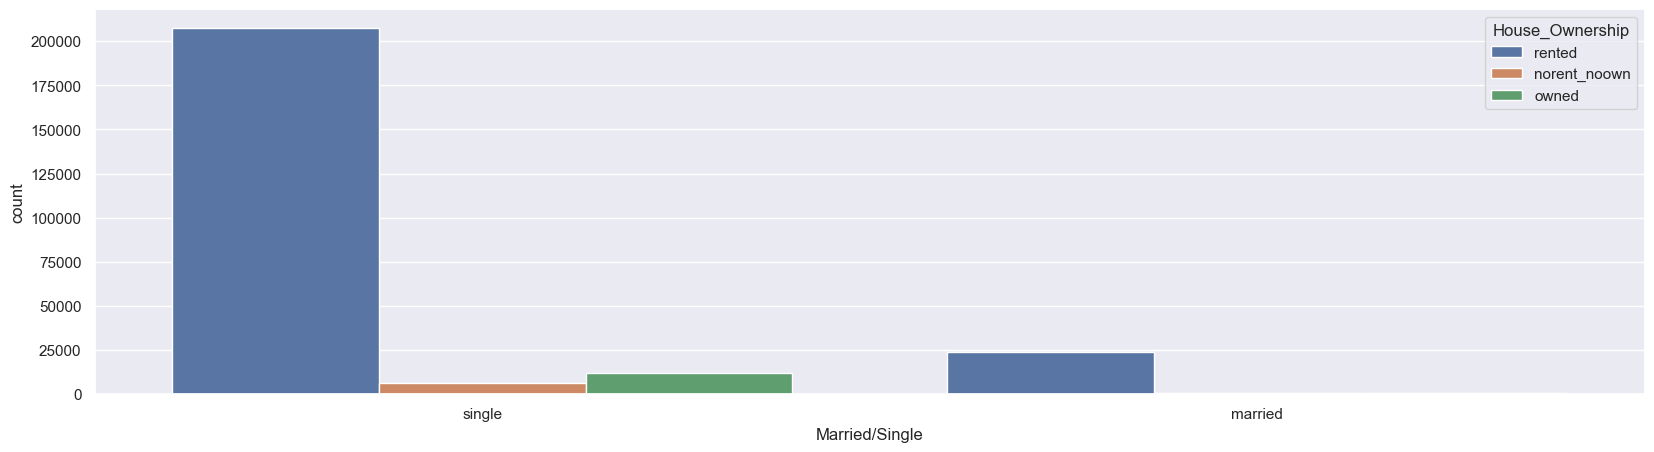

In [29]:
# Show house ownership according to marital status.
plt.figure(figsize=(20,5))
s5 = sns.countplot(data=df,x='Married/Single',hue='House_Ownership')
plt.show()

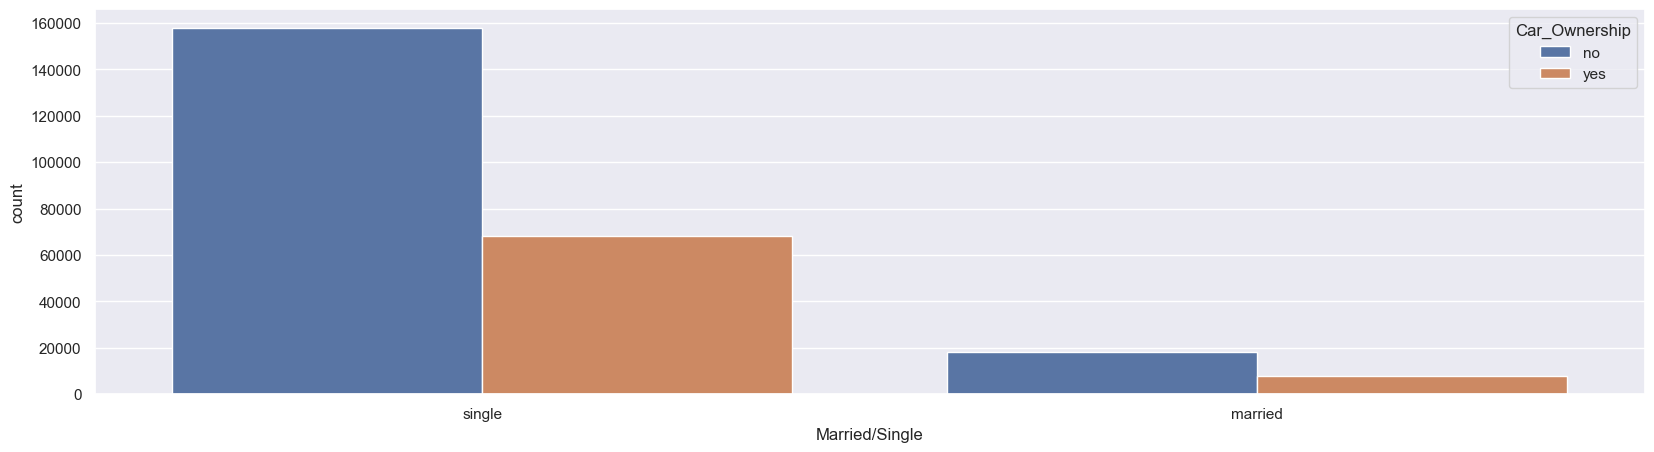

In [30]:
# Show car ownership according to marital status.
plt.figure(figsize=(20,5))
s6 = sns.countplot(data=df,x='Married/Single',hue='Car_Ownership')
plt.show()

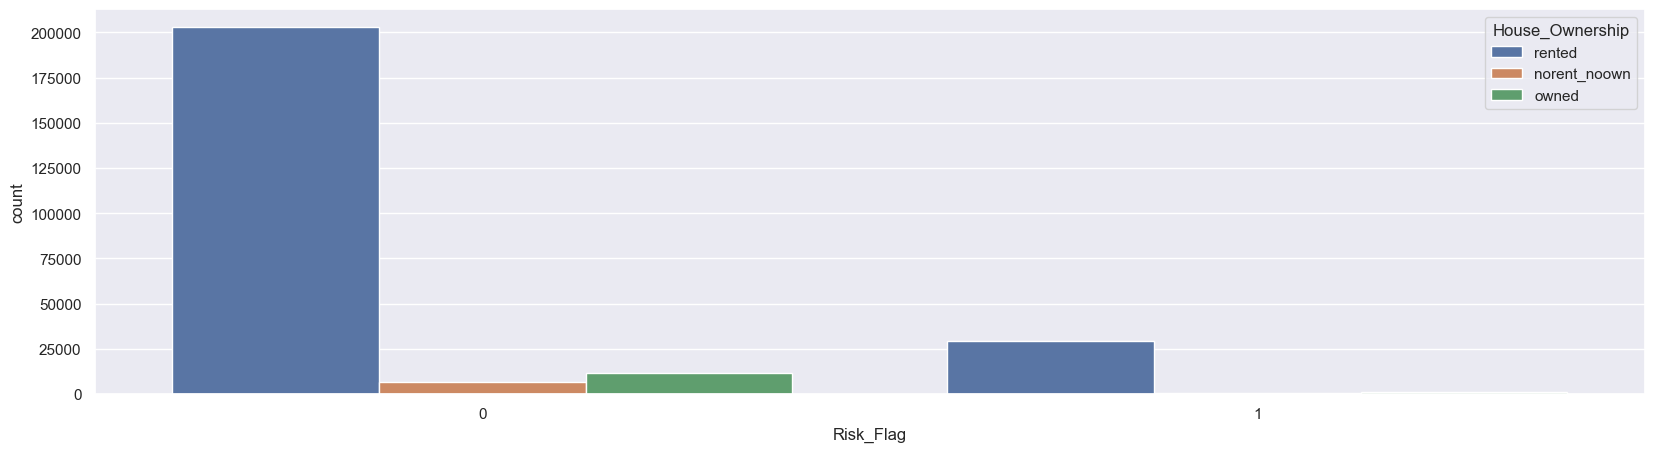

In [31]:
# Show defaulters according to house ownership.
plt.figure(figsize=(20,5))
s7 = sns.countplot(data=df,x='Risk_Flag',hue='House_Ownership')
plt.show()

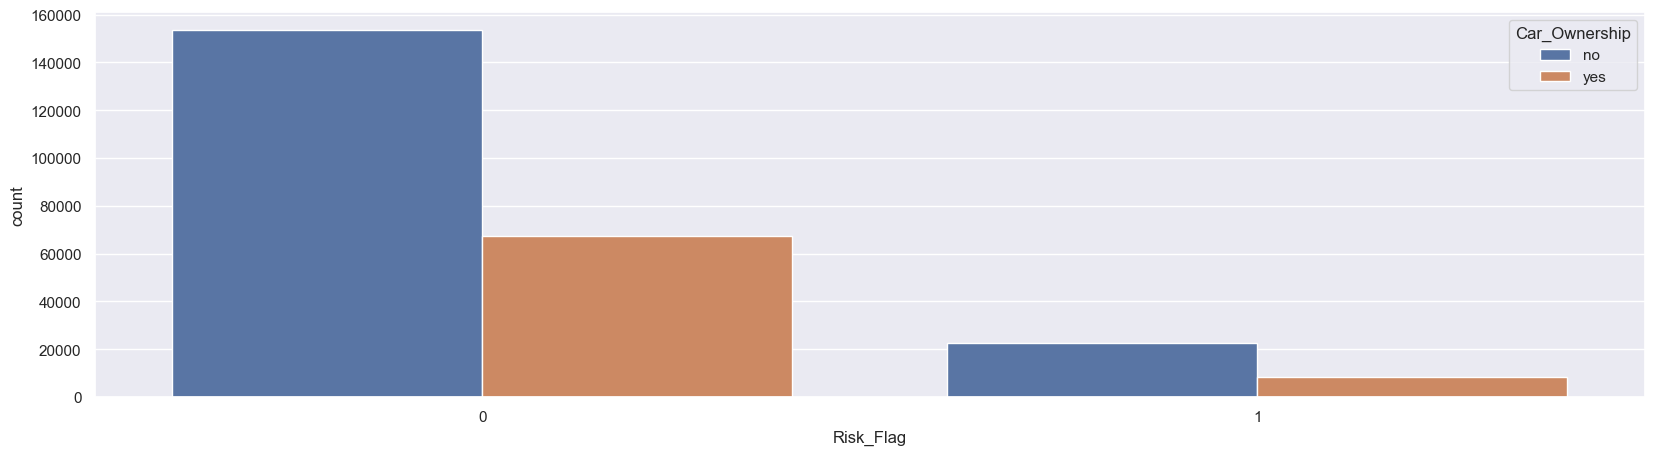

In [32]:
# Show defaulters according to car ownership.
plt.figure(figsize=(20,5))
s8 = sns.countplot(data=df,x='Risk_Flag',hue='Car_Ownership')
plt.show()

In [33]:
# Show defaulters according to age groups. 
# Filtering of data on the basis of risk flag.
risk_0 = df[df['Risk_Flag']==0]
risk_1 = df[df['Risk_Flag']==1]

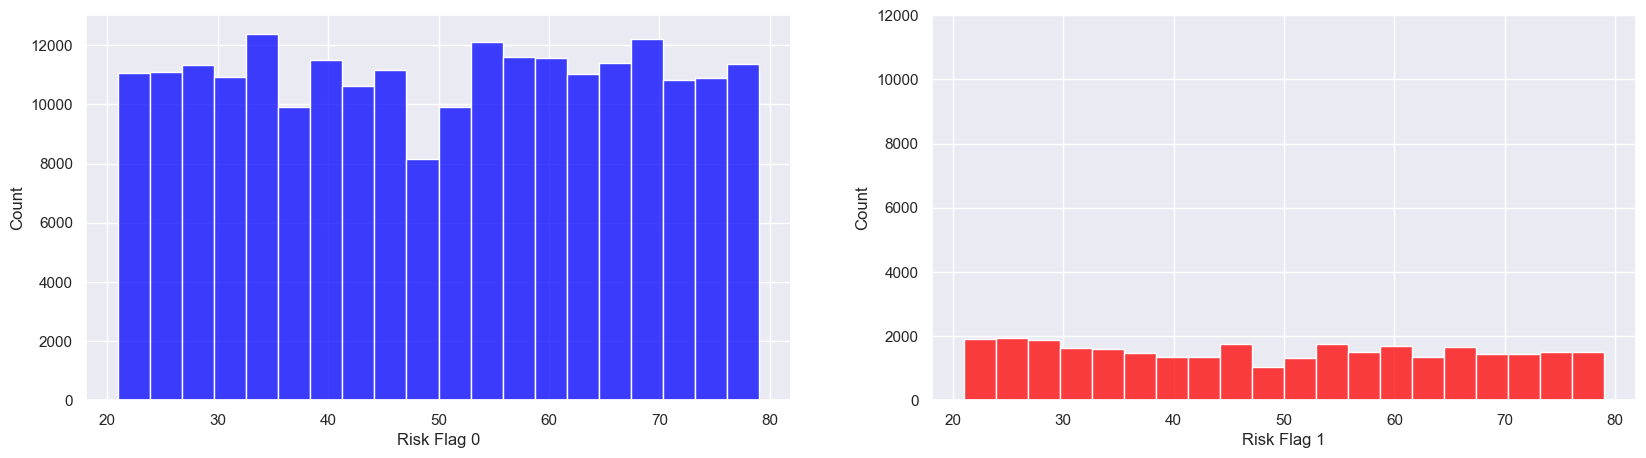

In [41]:
# HistPlots.
plt.rcParams["figure.figsize"] = [20, 5]
f, ax = plt.subplots(1,2)
s9 = sns.histplot(data=risk_0,x='Age',bins=20,color='blue',ax=ax[0])
s10 = sns.histplot(data=risk_1,x='Age',bins=20,color='red',ax=ax[1])
s10.set_yticks(range(0,14000,2000))
ax[0].set(xlabel="Risk Flag 0")
ax[1].set(xlabel="Risk Flag 1")
plt.show()

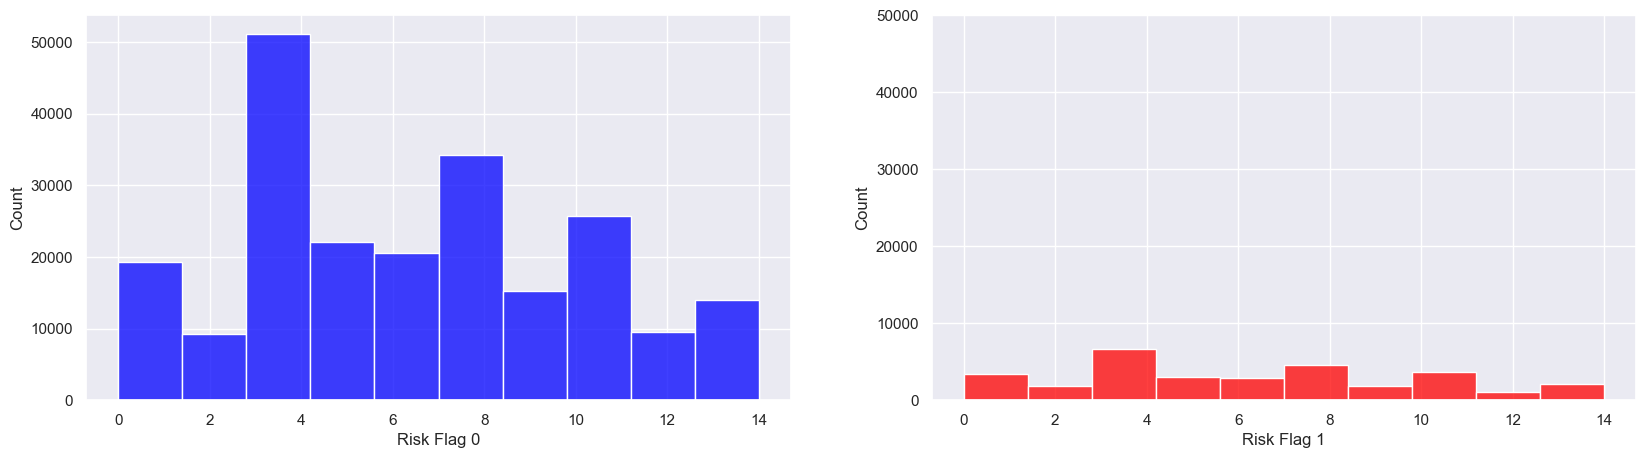

In [38]:
# Show the defaulters according to CURRENT_JOB_YRS.
plt.rcParams["figure.figsize"] = [20, 5]
f, ax = plt.subplots(1,2)
s13 = sns.histplot(data=risk_0,x='CURRENT_JOB_YRS',bins=10,color='blue',ax=ax[0])
s14 = sns.histplot(data=risk_1,x='CURRENT_JOB_YRS',bins=10,color='red',ax=ax[1])
s14.set_yticks(range(0,60000,10000))
ax[0].set(xlabel="Risk Flag 0")
ax[1].set(xlabel="Risk Flag 1")
plt.show()

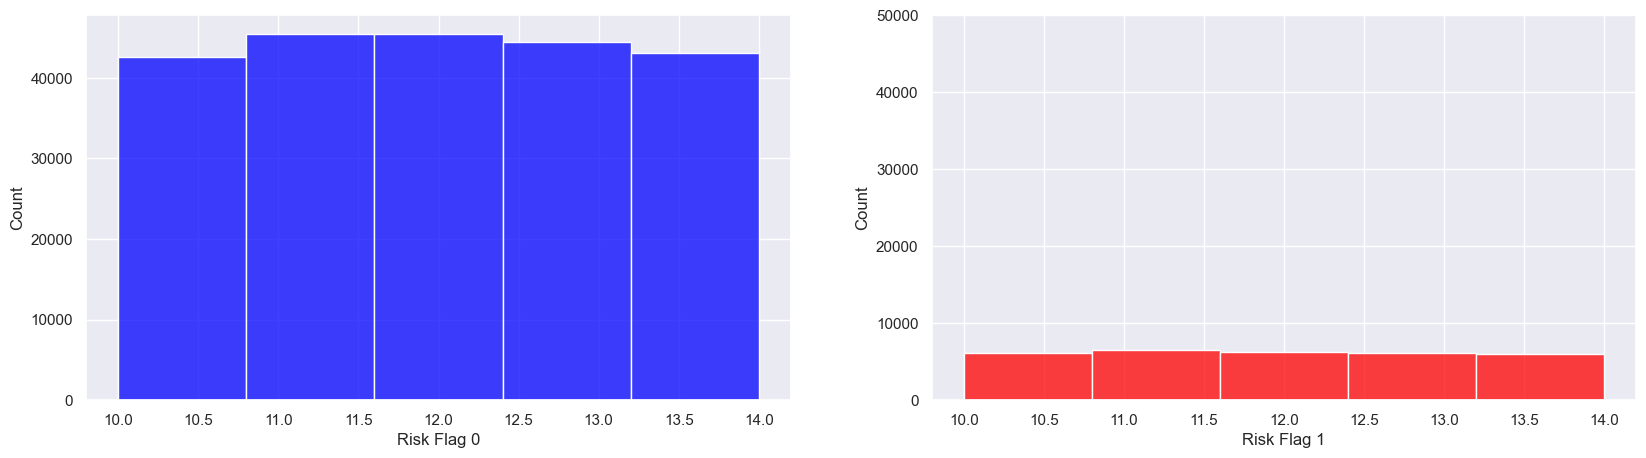

In [39]:
# Show the defaulters according to CURRENT_HOUSE_YRS.
plt.rcParams["figure.figsize"] = [20, 5]
f, ax = plt.subplots(1,2)
s15 = sns.histplot(data=risk_0,x='CURRENT_HOUSE_YRS',bins=5,color='blue',ax=ax[0])
s16 = sns.histplot(data=risk_1,x='CURRENT_HOUSE_YRS',bins=5,color='red',ax=ax[1])
s16.set_yticks(range(0,60000,10000))
ax[0].set(xlabel="Risk Flag 0")
ax[1].set(xlabel="Risk Flag 1")
plt.show()

In [37]:
df.head(3)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
